# imports

In [1]:
import sys
sys.path.append(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\10_code\UTvsXCT-preprocessing')
from preprocess_tools import onlypores, io, aligner, reslicer
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

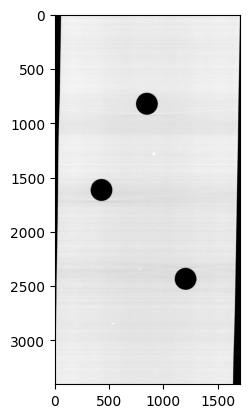

In [2]:
volume_path = Path(r"\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\02_XCT_data\Fabricacion Nacho\05_Probetas_Nacho_2025\probetas\Na_01_1\volume_eq_aligned.tif")

volume = io.load_tif(volume_path)

plt.imshow(volume.max(axis=0), cmap='gray')

In [3]:
volume.shape

(208, 3405, 1703)

(208, 1703, 3405)
(3405, 1703, 208)


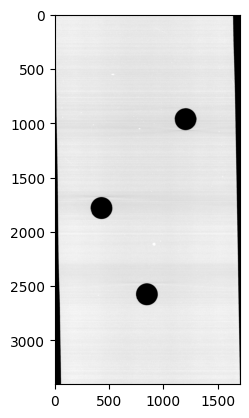

In [4]:
resliced_volume = reslicer.rotate_90(volume,False)
print(resliced_volume.shape)
resliced_volume = reslicer.reslice(resliced_volume,'Right')
print(resliced_volume.shape)
plt.imshow(resliced_volume.max(axis=-1), cmap='gray')

In [5]:
#get the frontwall and backwall of the xct volume
_,frontwall,backwall = aligner.crop_walls(resliced_volume)

print(frontwall, backwall)

Material mask memory analysis:
  Volume size: 1.12 GB
  Available memory: 154.39 GB
  Required estimate: 224659726.02 GB
  Using sequential implementation (memory conservation)...
Computing material mask using sequential processing...
Filling internal voids...
Material mask generation complete.
8 193


In [6]:
onlypores,sample_mask,binary = onlypores.onlypores(volume,frontwall=frontwall, backwall=backwall, min_size_filtering=8)

Starting pore detection analysis...
Computing volume bounding box...
Original volume shape: (208, 3405, 1703)
Data bounding box: Z[0:207], Y[0:3404], X[0:1702]
Cropped volume shape: (208, 3405, 1703)
Applying Sauvola adaptive thresholding...
Volume size: 1.12 GB
Available memory: 127.49 GB
Required memory estimate: 2.25 GB
Using parallel implementation...
Window size adjusted to 31 (must be odd)
Applying Sauvola thresholding with parallel processing...
Excluding front wall: slices 0 to 7
Excluding back wall: slices 193 to end
Generating material mask...
Material mask memory analysis:
  Volume size: 1.12 GB
  Available memory: 123.95 GB
  Required estimate: 224659726.02 GB
  Using sequential implementation (memory conservation)...
Computing material mask using sequential processing...
Filling internal voids...
Material mask generation complete.
Initial pore detection complete. Found 23835959 pore voxels.
Applying pore filtering with minimum size: 8
Cleaning pores with min_size=8...
  In

In [8]:
#save in the same folder with _onlypores , _samplemask and _binary suffixes
io.save_tif(volume_path.parent / f"{volume_path.stem}_onlypores.tif", onlypores.astype(np.uint8)*255)
# io.save_tif(volume_path.parent / f"{volume_path.stem}_samplemask.tif", sample_mask.astype(np.uint8)*255)
# io.save_tif(volume_path.parent / f"{volume_path.stem}_binary.tif", binary.astype(np.uint8)*255)